<a href="https://colab.research.google.com/github/andytamtran/Test/blob/main/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [118]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [119]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/x_superbowl.csv')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [120]:
pd.set_option('display.max_colwidth', None)

Cleans the data and drops some columns that are not needed, also changes a float to a str. Only works once per full runtime.

In [121]:
df.dropna()
df.drop(columns=['id_str'], inplace=True)
df.drop(columns=['scopes'], inplace=True)
df['id'] = df['id'].astype(str)


df['text'] = df['text'].str.replace('?', '')
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].str.replace('amp;', '')
df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/iphone"', '')
df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/android"', '')
df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/ipad"', '')
df['source'] = df['source'].str.replace('<a href="https://mobile.twitter.com"', '')
df['source'] = df['source'].str.replace('rel="nofollow">', '')
df['source'] = df['source'].str.replace('</a>', '')




df.head(5)

<ipython-input-121-f64bf74dc213>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace('?', '')
<ipython-input-121-f64bf74dc213>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/iphone"', '')
<ipython-input-121-f64bf74dc213>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/android"', '')
<ipython-input-121-f64bf74dc213>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/ipad"', '')
<ipython-input-121-f64bf74dc213>:13: Futu

Unnamed: 0                       _id                      created_at  \
0           0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1           1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2           2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3           3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4           4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   

            id  \
0  1.35863e+18   
1  1.35863e+18   
2  1.35863e+18   
3  1.35863e+18   
4  1.35863e+18   

                                                                                                                                        text  \
0                                                                                                                   @Rebe_Charizard m(*_ _)m   
1                                                                                                                   RT @iiiRatcha: "   M&M "   
2   @kashDAI not you listening to cfm and m&m too! i thought it was just icsm.  truthfully, whatever twice releases, https://t.co/gzMs4S5wBO   
3  RT @_soniashenoy: M&M says Ssangyong deal unlikely to be concludedM&M has recognised 1210cr as a one time impairment loss related to ssan   
4    RT @mmschocolate: This years #SuperBowlLV commercial proves M&MS can make almost any situation better except, of course, when @danjlevy   

  display_text_range               source  truncated  in_reply_to_status_id  \
0           [16, 45]   Twitter for iPhone      False           1.358630e+18   
1                NaN   Twitter for iPhone      False                    NaN   
2           [9, 140]   Twitter for iPhone       True           1.358630e+18   
3                NaN      Twitter Web App      False                    NaN   
4                NaN   Twitter for iPhone      False                    NaN   

   in_reply_to_status_id_str  ...  lang   matching_rules  \
0               1.358634e+18  ...    ja  [{'tag': None}]   
1                        NaN  ...    th  [{'tag': None}]   
2               1.358633e+18  ...    en  [{'tag': None}]   
3                        NaN  ...    en  [{'tag': None}]   
4                        NaN  ...    en  [{'tag': None}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

This creates an engagment column that adds up the retweet and favorite columns to show us the top ten tweets by this metric.

In [122]:
retweet_column = 'retweet_count'
favorite_column = 'favorite_count'
df['engagement'] = df[retweet_column] + df[favorite_column]
df_sorted = df.sort_values(by='engagement', ascending=False)
top_ten_tweets = df_sorted.head(10)
print(top_ten_tweets[['text', 'engagement']])

                                                                                                                                            text  \
1531                                                                                                                      CR @2SNS3314DMm(*_ _)m   
9498   hola que tal, soy parte de la comunidad de mmn y estoy en sus directos diariamente, aclaro que esto no va de mala https://t.co/UfIREXOxrb   
8085                                                          M&M commercial shows a confessional...Nun: Yay, Confession! #SuperBowlintheConvent   
9183                                                                                                            M&M commercialWhat do we rank it   
7932  *watching the commercial where someone gives priest in confessional M&M's in apologySister 1: hey, do you think th https://t.co/C4WUaZKa5o   
8391                                                                                   M&Ms off to the early lea

This code displays the amount of tweets from the top three sources

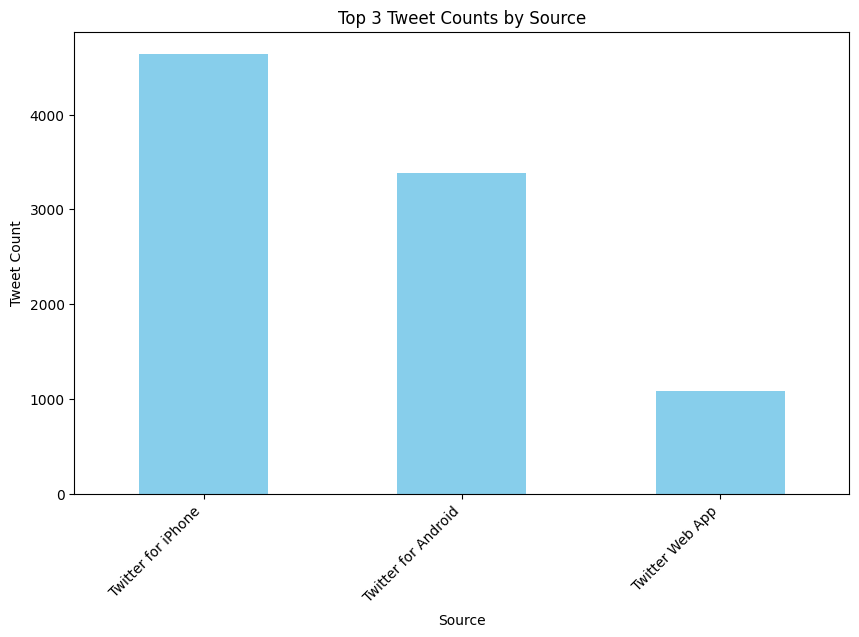

In [123]:
source_counts = df['source'].value_counts()
top_ten_sources = source_counts.head(3)
plt.figure(figsize=(10, 6))
top_ten_sources.plot(kind='bar', color='skyblue')
plt.title('Top 3 Tweet Counts by Source')
plt.xlabel('Source')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')
plt.show()